In [11]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
for dirname, _, filenames in os.walk('../kaggle/Global Country Information Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../kaggle/Global Country Information Dataset\world-data-2023.csv


In [3]:
df = pd.read_csv('../kaggle/Global Country Information Dataset/world-data-2023.csv')

In [4]:
df.head()

Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0  Afghanistan               60           AF                58.10%   
1      Albania              105           AL                43.10%   
2      Algeria               18           DZ                17.40%   
3      Andorra              164           AD                40.00%   
4       Angola               26           AO                47.50%   

  Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0        652,230           323,000       32.49          93.0   
1         28,748             9,000       11.78         355.0   
2      2,381,741           317,000       24.28         213.0   
3            468               NaN        7.20         376.0   
4      1,246,700           117,000       40.73         244.0   

  Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
0              Kabul         8,672  ...                           78.40%   
1             Tirana         4,536  ...                           56.90%   
2            Algiers       150,006  ...                           28.10%   
3   Andorra la Vella           469  ...                           36.40%   
4             Luanda        34,693  ...                           33.40%   

  Physicians per thousand  Population  \
0                    0.28  38,041,754   
1                    1.20   2,854,191   
2                    1.72  43,053,054   
3                    3.33      77,142   
4                    0.21  31,825,295   

   Population: Labor force participation (%) Tax revenue (%) Total tax rate  \
0                                     48.90%           9.30%         71.40%   
1                                     55.70%          18.60%         36.60%   
2                                     41.20%          37.20%         66.10%   
3                                        NaN             NaN            NaN   
4                                     77.50%           9.20%         49.10%   

  Unemployment rate Urban_population   Latitude  Longitude  
0            11.12%        9,797,273  33.939110  67.709953  
1            12.33%        1,747,593  41.153332  20.168331  
2            11.70%       31,510,100  28.033886   1.659626  
3               NaN           67,873  42.506285   1.521801  
4             6.89%       21,061,025 -11.202692  17.873887  

[5 rows x 35 columns]

In [5]:
column_names = df.columns
column_names

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [6]:
df['CPI'].unique()

array(['149.9', '119.05', '151.36', nan, '261.73', '113.81', '232.75',
       '129.18', '119.8', '118.06', '156.32', '116.22', '117.59',
       '179.68', '134.09', '117.11', '105.68', '110.71', '167.18',
       '148.32', '104.9', '149.75', '167.4', '99.03', '114.42', '106.58',
       '182.11', '111.61', '110.5', '127.63', '118.65', '116.76',
       '186.86', '117.7', '131.91', '125.08', '140.95', '103.62',
       '124.74', '128.85', '109.82', '102.51', '116.48', '133.85',
       '110.35', '120.25', '103.87', '135.5', '124.14', '288.57',
       '111.23', '124.35', '122.14', '143.86', '132.3', '112.33',
       '110.05', '122.19', '172.73', '133.61', '112.85', '268.36',
       '101.87', '107.43', '142.92', '262.95', '111.65', '116.19',
       '179.29', '150.34', '121.64', '129', '180.44', '151.18', '550.93',
       '119.86', '108.15', '110.62', '162.47', '105.48', '125.6',
       '182.75', '180.51', '99.55', '126.6', '155.68', '135.87', '116.86',
       '130.02', '155.86', '223.13', '125.

In [8]:
fig = px.choropleth(df, locations='Country', locationmode='country names', color='GDP', hover_name='Country',
                    color_continuous_scale=px.colors.sequential.Plasma, title='Global GDP')
fig.show()

In [9]:
fig = px.choropleth(df, locations='Country', locationmode='country names', color='Population', hover_name='Country',
                   color_continuous_scale=px.colors.sequential.Plasma, title='Global Population')
fig.show()

In [12]:
correlation_matrix = df.corr()

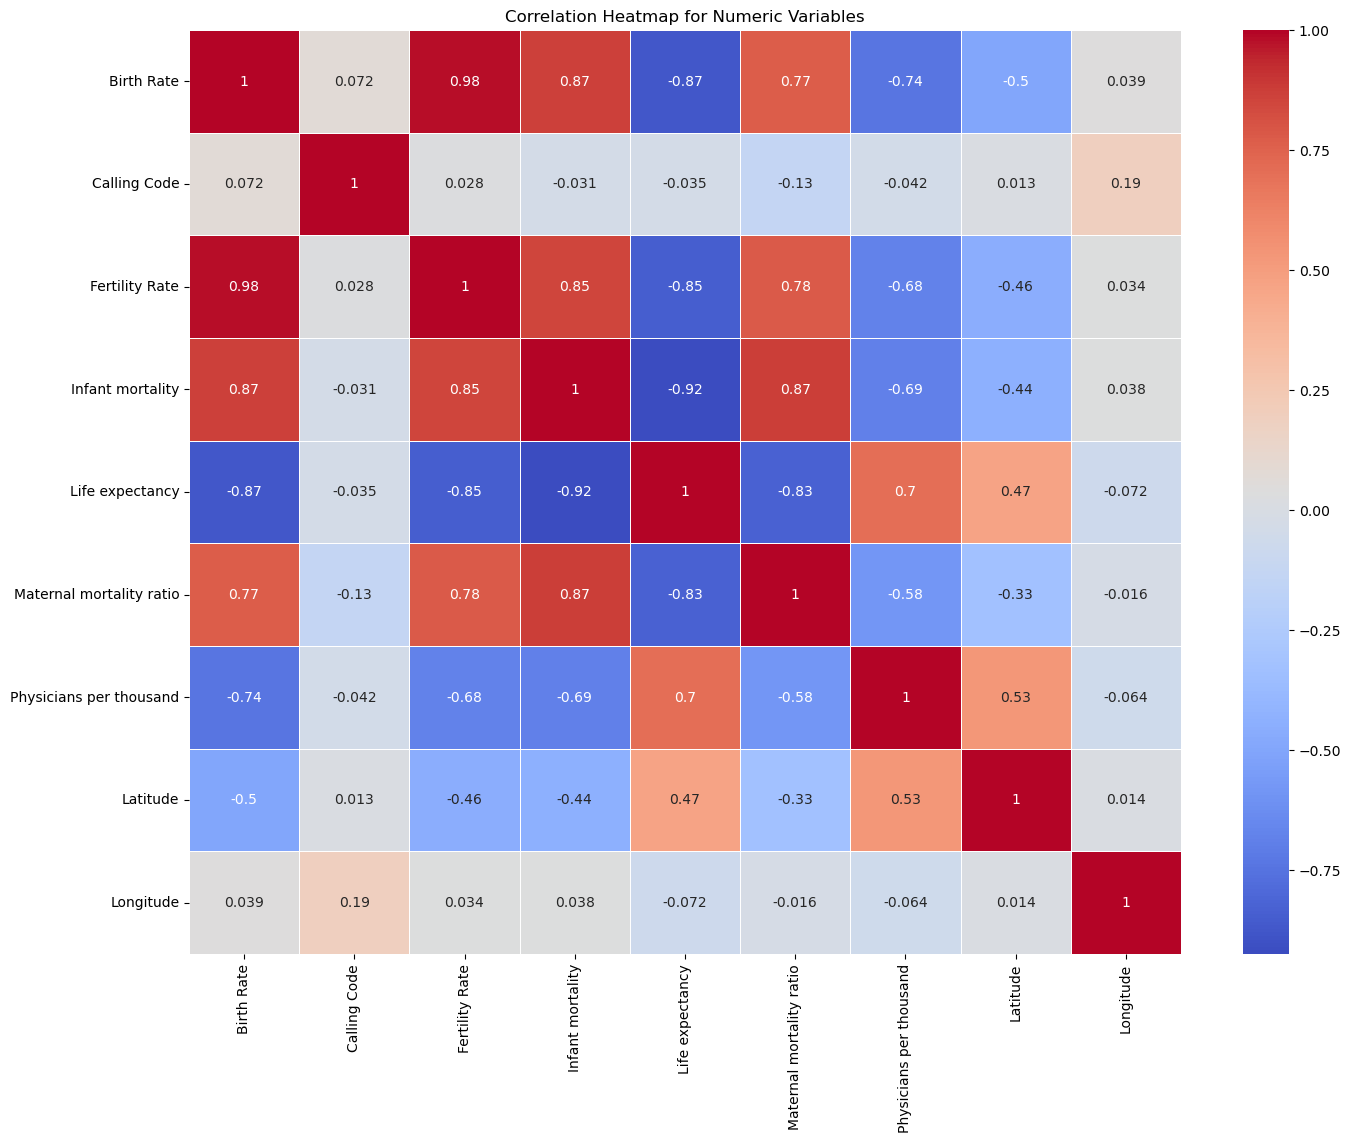

In [13]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numeric Variables')
plt.show()

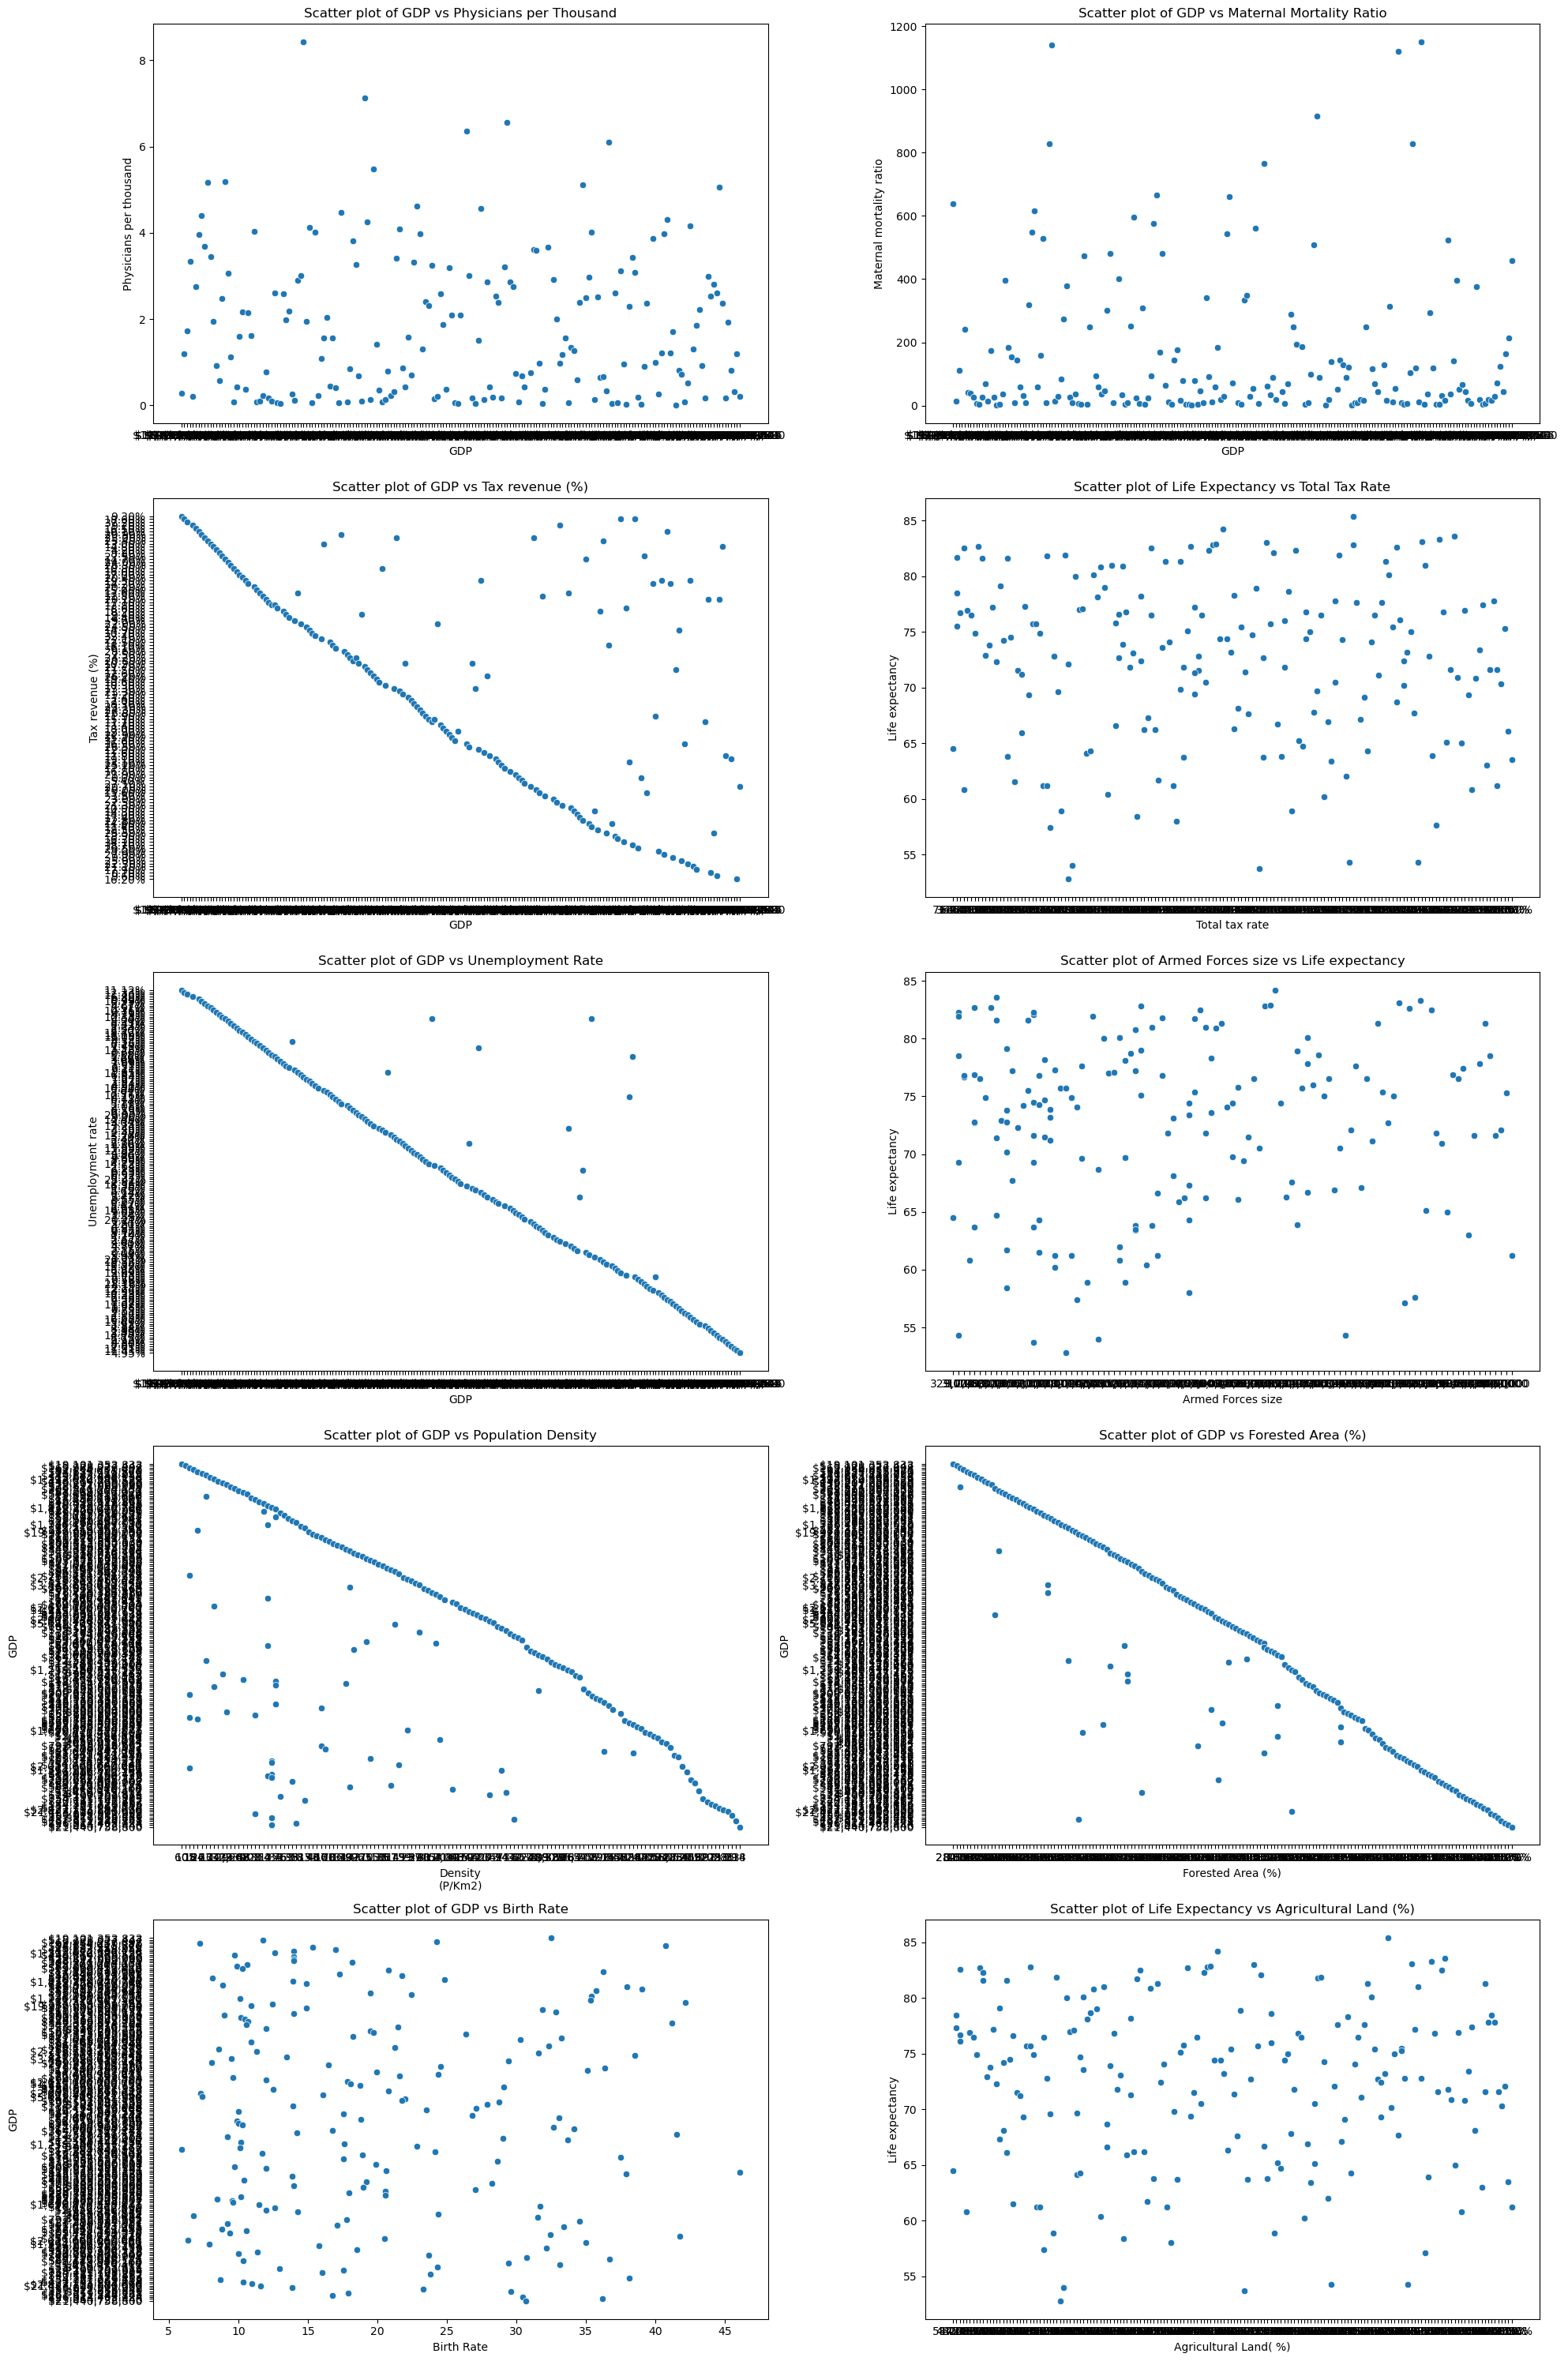

In [16]:
fig, ax = plt.subplots(5, 2, figsize=(20, 30))

sns.scatterplot(x='GDP', y='Physicians per thousand', data=df, ax=ax[0, 0])
ax[0, 0].set_title('Scatter plot of GDP vs Physicians per Thousand')

sns.scatterplot(x='GDP', y='Maternal mortality ratio', data=df, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot of GDP vs Maternal Mortality Ratio')

sns.scatterplot(x='GDP', y='Tax revenue (%)', data=df, ax=ax[1, 0])
ax[1, 0].set_title('Scatter plot of GDP vs Tax revenue (%)')

sns.scatterplot(x='Total tax rate', y='Life expectancy', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Scatter plot of Life Expectancy vs Total Tax Rate')

sns.scatterplot(x='GDP', y='Unemployment rate', data=df, ax=ax[2, 0])
ax[2, 0].set_title('Scatter plot of GDP vs Unemployment Rate')

sns.scatterplot(x='Armed Forces size', y='Life expectancy', data=df, ax=ax[2, 1])
ax[2, 1].set_title('Scatter plot of Armed Forces size vs Life expectancy')

sns.scatterplot(x='Density\n(P/Km2)', y='GDP', data=df, ax=ax[3, 0])
ax[3, 0].set_title('Scatter plot of GDP vs Population Density')

sns.scatterplot(x='Forested Area (%)', y='GDP', data=df, ax=ax[3, 1])
ax[3, 1].set_title('Scatter plot of GDP vs Forested Area (%)')

sns.scatterplot(x='Birth Rate', y='GDP', data=df, ax=ax[4, 0])
ax[4, 0].set_title('Scatter plot of GDP vs Birth Rate')

sns.scatterplot(x='Agricultural Land( %)', y='Life expectancy', data=df, ax=ax[4, 1])
ax[4, 1].set_title('Scatter plot of Life Expectancy vs Agricultural Land (%)')

plt.tight_layout()
plt.show()

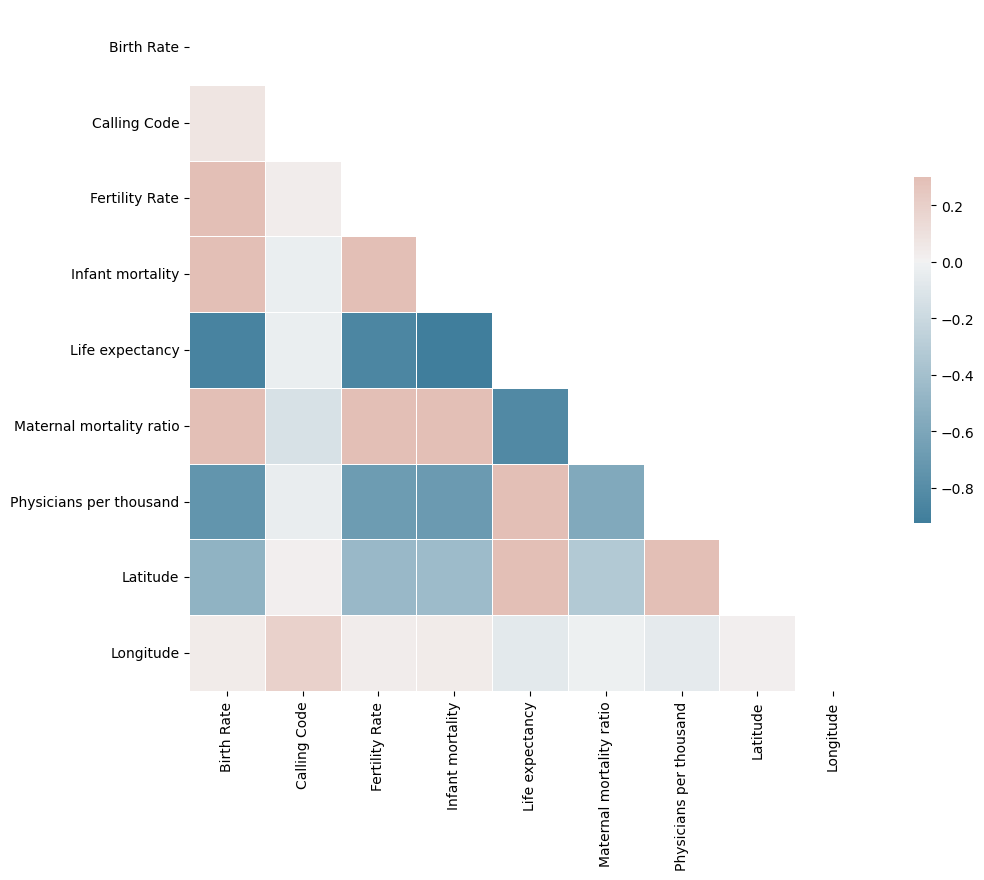

In [17]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})
plt.show()

In [18]:
kpi_df = df[['GDP', 'Population', 'Life expectancy', 'CPI']]
kpi_df_normalized = (kpi_df - kpi_df.min()) / (kpi_df.max() - kpi_df.min())
kpi_df_normalized['Country'] = df['Country']
fig = px.parallel_coordinates(kpi_df_normalized, color="Life expectancy", labels={"GDP": "GDP", "Population": "Population",
                                                                        "Life expectancy": "Life expectancy", "CPI": "CPI"}, 
                              color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=0.5)
fig.show()

In [19]:
fig = px.choropleth(df, locations='Country', locationmode='country names', color='GDP', hover_name='Country',
                   color_continuous_scale=px.colors.sequential.Plasma, title='Global GDP')
fig.show()

In [20]:
fig = px.choropleth(df, locations='Country', locationmode='country names', color='Population', hover_name='Country', 
                    color_continuous_scale=px.colors.sequential.Plasma, title='Global Population')
fig.show()

In [21]:
fig = px.scatter_3d(df, x='GDP', y='Population', z='Life expectancy', color='Country', opacity=0.7)
fig.update_traces(marker=dict(size=5))
fig.show()

In [22]:
fig = px.scatter_3d(df, x='GDP', y='Population', z='CPI', color='Country')
fig.update_traces(marker=dict(size=5))
fig.show()